<a href="https://colab.research.google.com/github/daje0601/DS_project/blob/main/%5B%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC%5D%2002.%20OpenCV%20Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [6]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files 

import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

# 이미지 처리 (Image Processing)



## Resize

- `cv2.resize()`
  - 사이즈가 변하면 pixel사이의 값을 결정을 해야함
  
  - 보간법(Interpolation method)
    - 사이즈를 줄일 때 : `cv2.INTER_AREA` 
    
    - 사이즈를 크게 할 때 : `cv2.INTER_CUBIC` , `cv2.INTER_LINEAR`

  - `Parameters`
    - `img` : Image

    - `dsize` : Manual Size. 가로, 세로 형태의 tuple(ex; (100,200))

    - `fx` : 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5

    - `fy` : 세로 사이즈의 배수

    - `interpolation` : 보간법

![](https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png)

* https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png

In [7]:
files.upload()

Saving Lenna.png to Lenna (1).png


{'Lenna.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xdc\x00\x00\x00\xdc\x08\x06\x00\x00\x00\x1bZ\xcf\x81\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\x07tIME\x07\xe1\x01\n\x0c\x14#\xc6\xc2\xf4\x10\x00\x00\x80\x00IDATx\xda|\xfdY\xac\xa5Yv\xdf\x89\xfd\xd6\xda{\x7f\xdf9\xe7\x0e1dDF\xceUY\x03\x8bU,\x0e\xe2 Z2E\x8d-\xc8\x96\x07Yv\x1b\x96\x00=\xf8\xc10l\xc0\x80_\xfa\xd9\xedG\xc3\xcfm?\x180\xfc\xe4\xb6\xd1\xdd\xf0\x80\xb6\x81nw\xb3eQ&\xd9\x14IQ\x14\xa9*\xb2\xaa\xb22\xab*\xabr\x88\xf1\x0e\xe7\x9c\xef\xdb{\xaf\xe5\x87\xb5Od\x91\xa2:\x81@fF\xdc\xb8\xf7\x9c\xf3\xeda\xad\xff\xfa\x0f\xf2\xc1\xff\xe6\x7f\xe5\x0e\xa4~\x84<\xe1\xbd\xe3\xbe\xd2\xddqqT\x80zKO\x1bR\xab\x98o\x11i$ix\xd9Q\x8a\xa1*HV\xd2Tp\xeb\xa8\x19\xe6\x82]7\x96\xdb\x85\x9b}\xe1\xd9\x87O\xf9\xe8\xf9\xc2\xf5\x01\x1a\x89\

In [8]:
image =cv2.imread("Lenna.png", cv2.IMREAD_UNCHANGED)
image.shape

(220, 220, 4)

In [9]:
height, width = image.shape[:2]

In [11]:
shrink = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

expand1 = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

expand2 = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

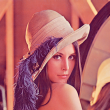

(None, (110, 110, 4))

In [13]:
cv2_imshow(shrink), shrink.shape

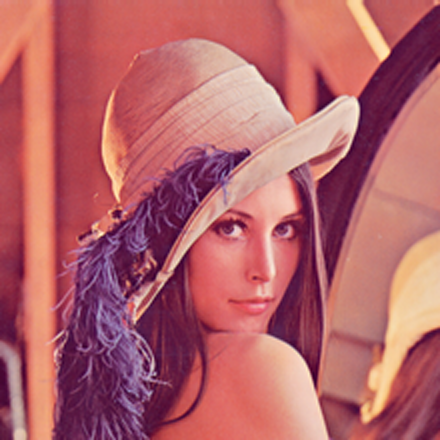

In [14]:
cv2_imshow(expand1)

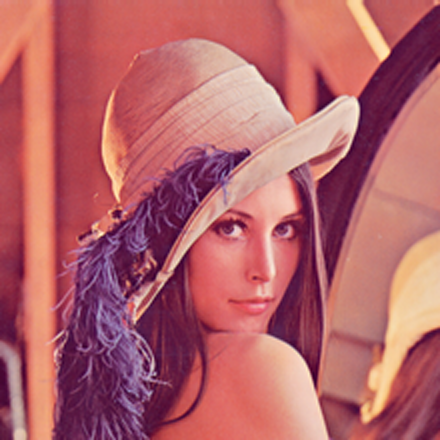

In [15]:
cv2_imshow(expand2)

## Translation

- 이미지의 위치를 변경

- `cv2.warpAffine()`

  - `Parameters` 
    - `src` : Image
    
    - `M` : 변환 행렬

    - `dsize` (tuple) : output image size(ex; (width=columns, height=rows)


In [16]:
rows, cols = image.shape[:2]
M = np.float32([[1, 0, 10], [0, 1, 20]])
dst = cv2.warpAffine(image, M, (cols, rows))

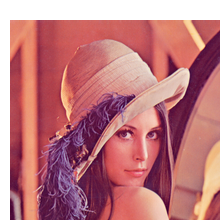

In [17]:
cv2_imshow(dst)

## Rotate

- 물체를 평면상의 한 점을 중심으로 𝜃 만큼 회전하는 변환

- 양의 각도는 시계반대방향으로 회전

- `cv2.getRotationMatrix2D()`
  
  - `Parameters`  	

    - `center` : 이미지의 중심 좌표
    
    - `angle` : 회전 각도

    - `scale` : scale factor

In [18]:
image.shape

(220, 220, 4)

In [19]:
rows, cols = image.shape[:2]
# 변환되는 기준 
M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 0.5)
dst = cv2.warpAffine(image, M, (cols, rows))

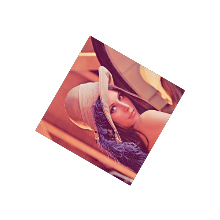

(220, 220, 4)


In [21]:
cv2_imshow(dst)
print(dst.shape)

In [22]:
rows, cols = image.shape[:2]
# 변환되는 기준 
M = cv2.getRotationMatrix2D((cols/2, rows/2), -60, 0.5)
dst = cv2.warpAffine(image, M, (cols, rows))

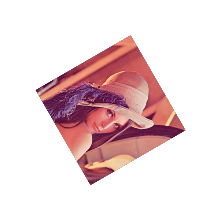

(220, 220, 4)


In [23]:
cv2_imshow(dst)
print(dst.shape)

## Flip

- 대칭 변환
  - 좌우 대칭 (좌우 반전)

  - 상하 대칭 (상하 반전)

- 입력 영상과 출력 영상의 픽셀이 1:1 매칭이므로 보간법이 필요 없음

- `cv2.flip()`

  - Parameters

    - `src` : 입력 영상

    - `flipCode` : 대칭 방법을 결정하는 flag 인자

      - 양수이면 좌우 대칭

      - 0이면 상하 대칭

      - 음수이면 상하, 좌우 대칭을 모두 실행

In [28]:
img =cv2.imread("Lenna.png", cv2.IMREAD_UNCHANGED)
img.shape

(220, 220, 4)

In [29]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

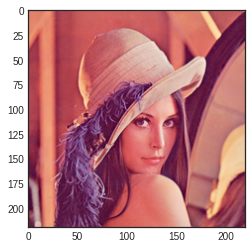

In [30]:
plt.imshow(img)
plt.show()

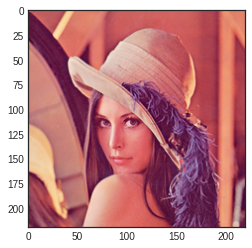

In [31]:
result1 = cv2.flip(img, 1)
plt.imshow(result1)
plt.show()

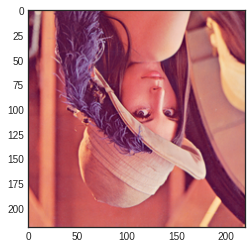

In [32]:
result2 = cv2.flip(img, 0)
plt.imshow(result2)
plt.show()

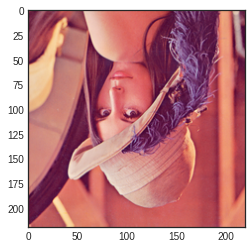

In [33]:
result3 = cv2.flip(img, -1)
plt.imshow(result3)
plt.show()

## Affine Transformation

- 선의 평행선은 유지되면서 이미지를 변환하는 작업

- 이동, 확대, Scale, 반전까지 포함된 변환

- `cv2.getAffineTransform()`

  - Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환행렬을 구할 수 있음

In [38]:
rows, cols, ch = image.shape
points1 = np.float32([[50, 100], [150, 100], [20, 20]])
points2 = np.float32([[50, 30], [150, 150], [20, 40]])

cv2.circle(image, (20, 10), 10, (255, 0, 0), -1)
cv2.circle(image, (40, 10), 10, (0, 255, 0), -1)
cv2.circle(image, (20, 20), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(points1, points2)

dst = cv2.warpAffine(image, M, (cols, rows))

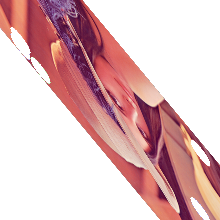

(220, 220, 4)


In [39]:
cv2_imshow(dst)
print(dst.shape)